# Lista de Exercício 4
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - ou identifique-se cópia - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

### Introdução:

Nesta lista de exercícios vamos estudar sobre a transformada de Fourier. Primeiramente vamos importar as bibliotecas que iremos utilizar:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [32]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/circulo.tif?raw=true", "circulo.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/faixahorizontal.tif?raw=true", "faixahorizontal.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/faixavertical.tif?raw=true", "faixavertical.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/hret_sim.tif?raw=true", "hret_sim.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/losango.tif?raw=true", "losango.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/parallelogram.tif?raw=true", "parallelogram.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/parallelogram_2.tif?raw=true", "parallelogram_2.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/quadrado.tif?raw=true", "quadrado.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/retangulohorizontal.tif?raw=true", "retangulohorizontal.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/retangulovertical.tif?raw=true", "retangulovertical.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/vret_sim.tif?raw=true", "vret_sim.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/pirate.tif?raw=true", "pirate.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
  

### 1) Transformada de Fourier 2D (4.0/10.0)


A transformada de Fourier de uma função amostrada finita é uma função contínua, periódica e infinita. No domínio da frequência, o espectro se repete
em infinitos períodos. O cálculo  da transformada é feito em apenas um período.

Como ela é, em geral, complexa, pode ser expressa na forma polar:<br/><br/>

$F(u,v) = |F(u,v)|e^{j\phi(u,v)}$ <br/>

sendo a magnitude (espectro de Fourier ou espectro de frequência):<br/><br/>

$|F(u,v)| = [R^2(u,v) + I^2(u,v)]^{1/2}$<br/>

e o ângulo de fase:<br/>

$\phi(u,v) = arctan[I(u,v)/R(u,v)]$ <br/>

sendo $R$ a parte real e $I$ a parte imaginária de $F(u,v)$.<br/><br/>

As componentes do espectro de frequências determinam as amplitudes das senóides que se combinam para formar a imagem resultante. Uma grande amplitude em determinada frequência, implica em maior proeminência, na imagem, de uma senóide nessa frequência. O contrário também é válido.
As componentes de fase são menos intuitivas, mas são tão importantes quanto o espectro de frequências. A fase é uma medida do deslocamento das várias senóides em relação à sua origem - é um arranjo de ângulos que apresentam grande parte das informações sobre a localização dos objetos discerníveis na imagem. 


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/brain_dft.png?raw=true" style="width:836px;height:266px;"></center>


<center><caption><b> Figura 1:</b> Espectro de frequência e ângulos de fase de uma imagem de ressonância magnética cerebral.</b></caption></center>
<caption><center> Referência: <a href="https://brain-development.org/ixi-dataset/">IXI Dataset</a>.</center></caption>

Funções de tranformada de Fourier utilizam algoritmos como *Fast Fourier Transform (FFT)* para o cálculo. Em python, a biblioteca Numpy fornece uma função pronta para a transformação considerando uma imagem (2D) [np.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html). Também oferece uma função para o deslocamento [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) - deixando o espectro centralizado (menores frequências no centro do espectro).

```python
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)
```

A função de transformada retorna uma matriz com números complexos, assim como esperado. Para cálculo da magnitude, a função [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html), em caso de números complexos $a+bj$, retorna o resultado conforme: 

$$\sqrt{(a^2+b^2)}$$

Como as amplitudes do espectro variam em um range muito grande e não equalizado, é necessário ajustar o contraste para que seja possível visualizar em um plot. Por esse motivo, faz-se uma transformação logarítma.

Atenção: essa transformação é aplicada apenas para efeito de visualização. Soma-se um valor pequeno, por exemplo "1", às magnitudes encontradas, tal como no exemplo, pois intensidades de valor 0 gerariam erro quando o log fosse calculado.


1.1) Calcule a transformada de Fourier das imagens listadas abaixo. Para cada imagem, mostre o espectro de frequências (amplitude), com a devida correção logarítma e centralização. **Comente os resultados encontrados em cada imagem**.

* circulo.tif

* faixahorizontal.tif

* faixavertical.tif

* losango.tif

* quadrado.tif

* retangulovertical.tif

* retangulohorizontal.tif

* vret_sim.tif

* hret_sim.tif

* parallelogram.tif

* parallelogram_2.tif

<Figure size 1500x1500 with 0 Axes>

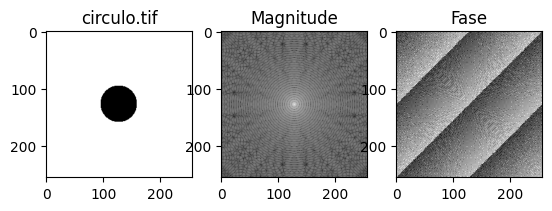

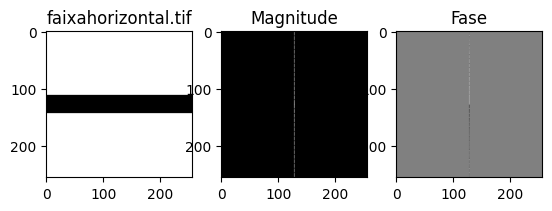

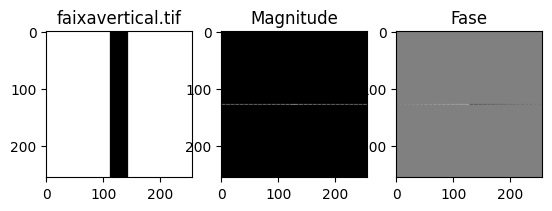

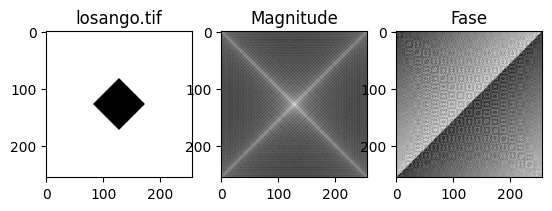

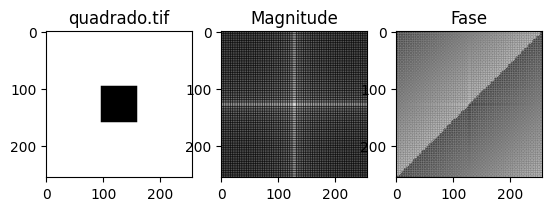

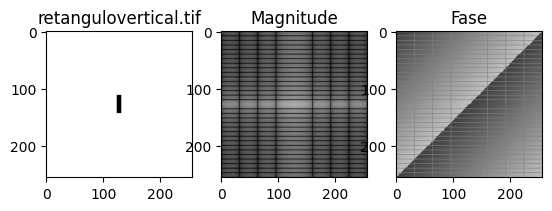

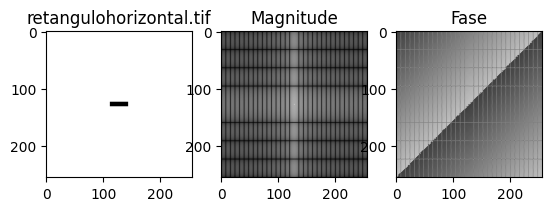

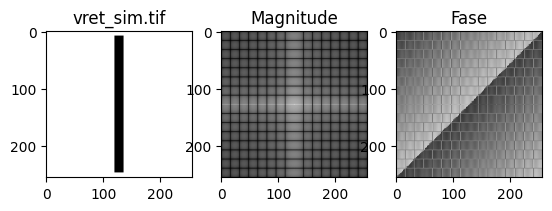

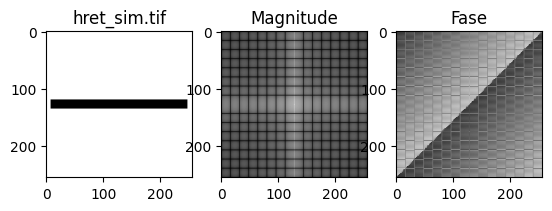

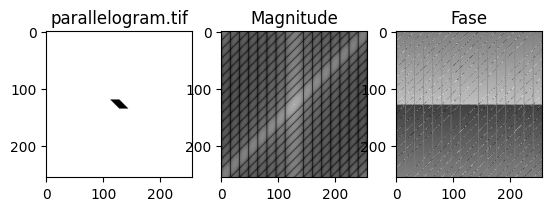

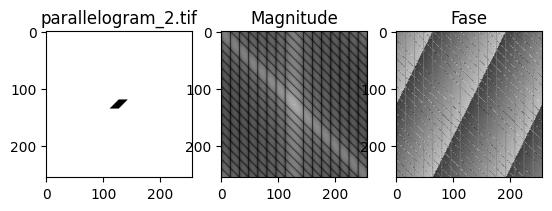

In [33]:
## -- Seu código começa AQUI -- ##
# Leitura das imagens
img = []
img_list = ['circulo.tif', 'faixahorizontal.tif', 'faixavertical.tif', 'losango.tif', 'quadrado.tif',
            'retangulovertical.tif', 'retangulohorizontal.tif', 'vret_sim.tif', 'hret_sim.tif',
            'parallelogram.tif', 'parallelogram_2.tif']


for name in img_list:
    image = cv.imread(name, cv.IMREAD_UNCHANGED)
    img.append(image)

# Cálculo das TFs
mag = []
phase = []

for image in img:

    f = np.fft.fftshift(np.fft.fft2(image))
    f_mag = 20*np.log(abs(f)+1.0)
    f_phase = np.angle(f)
    
    mag.append(f_mag)
    phase.append(f_phase)

# Mostrando as imagens
plt.figure(figsize=(15, 15))
for i in range(len(img_list)):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        
    ax1.imshow(img[i], cmap='gray')
    ax1.set_title('{}'.format(img_list[i]))
    ax2.imshow(mag[i], cmap='gray')
    ax2.set_title('Magnitude')
    ax3.imshow(phase[i], cmap='gray')
    ax3.set_title('Fase')
    plt.show()

## -- Seu código termina AQUI -- ##

## COMENTÁRIO: 
# Círculo: A magnitude tem algumas ondas circulares e é menor nas baixas frequências
# 
# Faixa Horizontal: A magnitude é uma faixa vertical, já que é só nessa direção que há variação
#
# Faixa Vertical: A magnitude é uma faixa horizontal, já que é só nessa direção que há variação
#
# Losango: Há uma faixa diagonal mais clara na magnitude, o que mostra que as variações diagonais são menores
#
# Quadrado: Como o quadrado é um losango rotacionado, o espectro de magnitudes é rotacionado,
# também, na direção onde a variação é menor (horizontal e vertical)
#
# Retangulo Vertical: O espectro do retangulo vertical lembra o da faixa vertical, com a adição de algumas
# faixas em frequências mais altas
# 
# Retangulo Horizontal: Esse espectro é bastante similar ao do retângulo vertical, mas rotacionado em 90°
# 
# Vret_sim: Esse espectro de magnitude é muito parecido com o do retângulo vertical, mas com as linhas mais
# esparsas, já que a imagem é mais grossa
# 
# Hret_sim: Esse espectro de magnitude é muito parecido com o do retângulo horizontal, mas com as linhas mais
# esparsas, já que a imagem é mais grossa
#
# Paralelograma: Esse espectro de magnitude possui, além da faixa vertical, uma faixa diagonal, em oposição 
# à rotação da imagem
#
# Paralelograma_2: Muito similar ao do paralelograma, mas espelhado no eixo Y

### 2) Domínio de frequência x Domínio da imagem (4.0/10.0)

Não há perda de informação entre transformações de Fourier, seja no sentido "de ida" (domínio de imagem para frequência) ou no sentido "da volta" (domínio da frequência para imagem). Na Figura 2, vemos o espectro de frequências correspondente a uma função 2D. Repare que há uma proporcionalidade entre o pico do espectro e as dimensões A, T e Z da função.


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/Espectro_2D.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 2:</b> Uma função 2D e uma seção do seu espectro (fora de escala).</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>



A biblioteca numpy também fornece funções para a descentralização [np.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html) e caminho inverso - domínio da frequência para imagem [np.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html). No processo de transformação, pelo algoritmo utilizado, restam alguns valores complexos (insignificantes), sendo necessário calcular o valor absoluto do resultado da transformada inversa para que seja possível visualizar a imagem. Veja o exemplo a seguir:

```python
ifshift = np.fft.ifftshift(f)
img = np.abs(np.fft.ifft2(ifshift))
```

2.1) Leia a imagem 'pirate.tif' e calcule o seu negativo. 
Em seguida, 

*   Calcule a diferença das médias das imagens (original e negativo). Qual o valor obtido?
*   Calcule o espectro de frequências da imagem original e do negativo. Centralize os espectros e guarde os valores absolutos calculados, pois serão importantes para o próximo exercício.
*   Faça o ajuste logarítmo e mostre as imagens e seus espectros correspondentes.



A diferença das médias é -31.72014617919922


<Figure size 1500x1500 with 0 Axes>

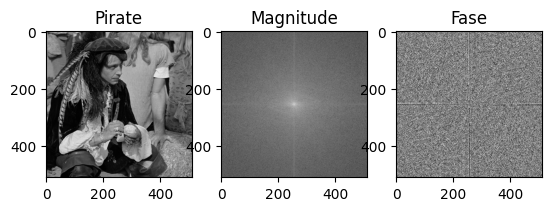

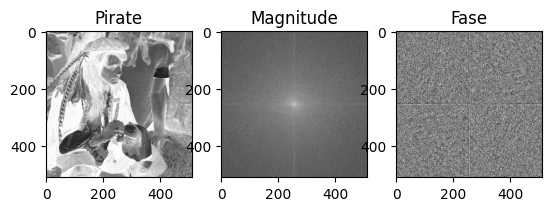

In [34]:
## -- Seu código começa AQUI -- ##
# Lendo a imagem
img = cv.imread('pirate.tif', cv.IMREAD_UNCHANGED)

# Calculando o negativo
img_neg = 255 - img

# Calculando a diferença das médias
m1 = np.matrix(img)
m2 = np.matrix(img_neg)

mean_dif = m1.mean() - m2.mean()

print('A diferença das médias é {}'.format(mean_dif))

# Calculando as TFs
f = np.fft.fftshift(np.fft.fft2(img))
f_neg = np.fft.fftshift(np.fft.fft2(img_neg))

f_mag = 20*np.log(abs(f)+1.0)
f_phase = np.angle(f)

f_neg_mag = 20*np.log(abs(f_neg)+1.0)
f_neg_phase = np.angle(f_neg)

# Mostrando as imagens e os espectros
plt.figure(figsize=(15, 15))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(img, cmap='gray')
ax1.set_title('Pirate')
ax2.imshow(f_mag, cmap='gray')
ax2.set_title('Magnitude')
ax3.imshow(f_phase, cmap='gray')
ax3.set_title('Fase')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(img_neg, cmap='gray')
ax1.set_title('Pirate')
ax2.imshow(f_neg_mag, cmap='gray')
ax2.set_title('Magnitude')
ax3.imshow(f_neg_phase, cmap='gray')
ax3.set_title('Fase')
plt.show()

## -- Seu código termina AQUI -- ##


2.2) Faça a diferença entre as magnitudes dos espectros armazenadas no exercício anterior - referentes à imagem original e seu negativo. Aplique o ajuste logarítmo e mostre o espectro resultante. O resultado deve ser um único ponto central. O que ele significa? Qual seu valor?

Dicas:
1. Mostre o espectro com figsize=(15,15) para melhor visualização.
2. Lembre-se de considerar a transformação logarítma apenas para visualização.

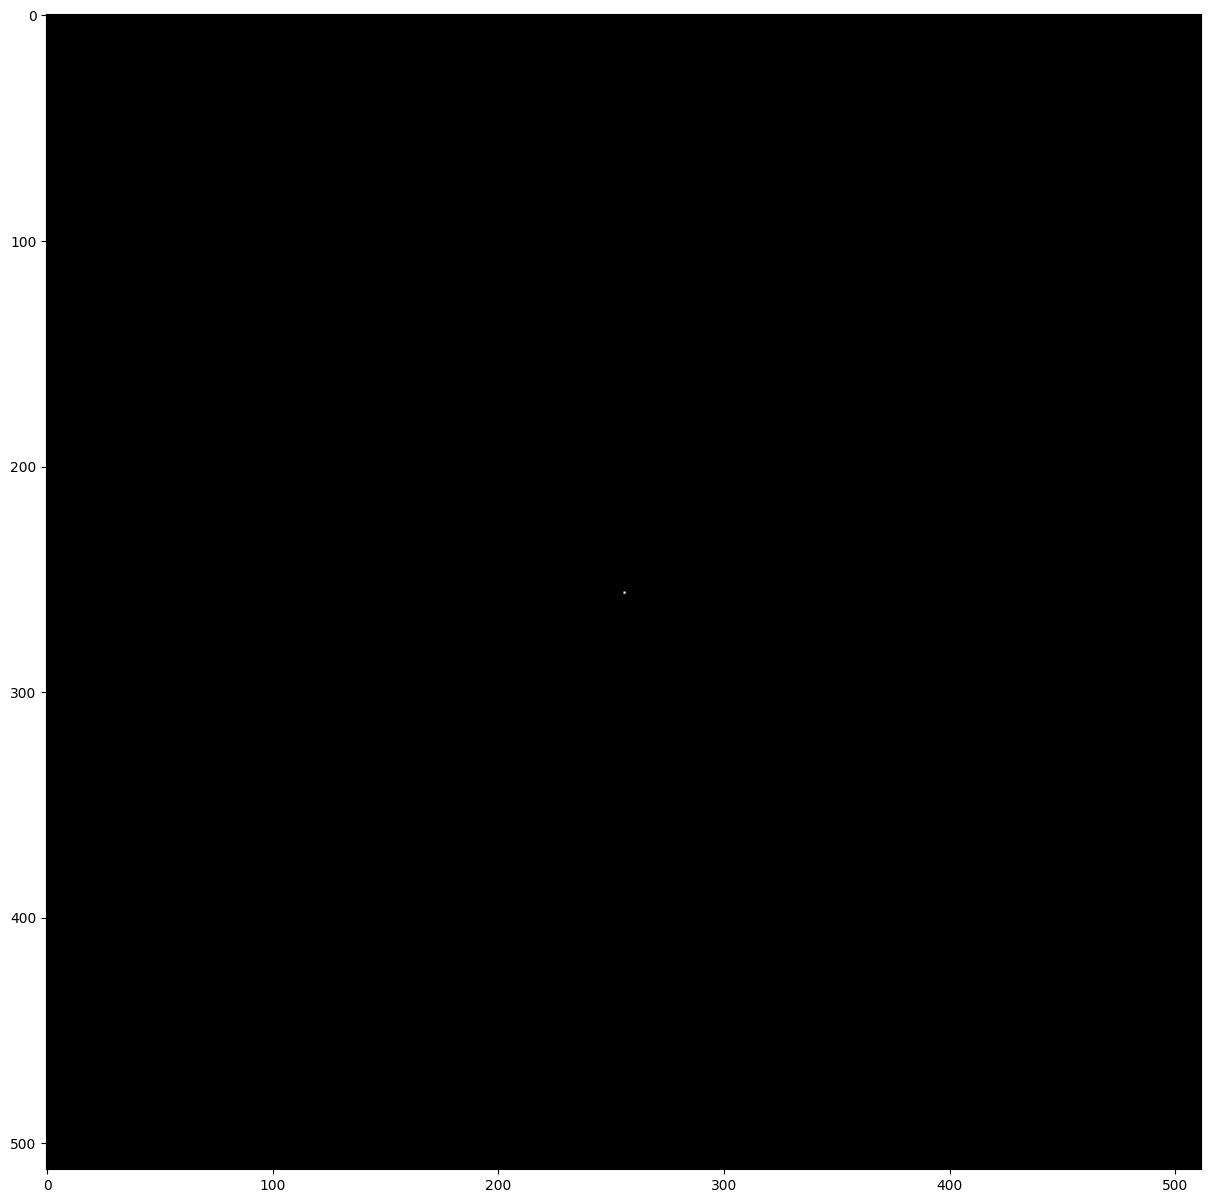

O valor central é 8315246.0


In [35]:
## -- Seu código começa AQUI -- ##
# Cálculo da diferença entre as magnitudes
f_dif = abs(abs(f) - abs(f_neg))
f_dif_mag = 20*np.log(f_dif + 1.0)

# Mostrando a diferença entre os espectros
plt.figure(figsize=(15,15))

plt.imshow(f_dif_mag, cmap='gray')
plt.show()

# Pegando o valor do ponto médio 
x, y = f_dif.shape

print('O valor central é {}'.format(f_dif[int(x/2)][int(y/2)]))
## -- Seu código termina AQUI -- ##

O pixel central irá representar o nível DC da imagem que foi transformada multiplicada pelo número de pixels.

2.3) Considere o espectro de diferença do exercício anterior e realize a transformada inversa. Calcule valor médio, máximo e mínimo da imagem obtida. O que representa essa imagem? **Compare com os valores obtidos nos exercícios 2.1 e 2.2 e comente os resultados.**

Média: 31.72014617919922
Máximo: 31.72014617919922
Mínimo: 31.72014617919922


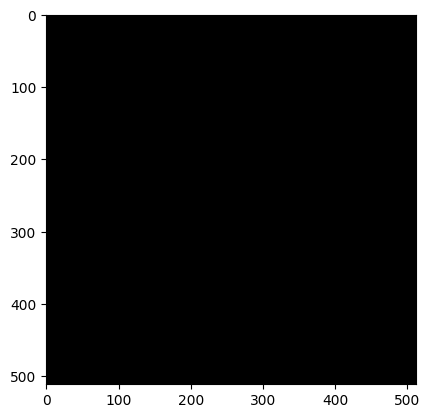

In [37]:
## -- Seu código começa AQUI -- ##
# Calculando a inversa
img_dif = np.abs(np.fft.ifft2(np.fft.ifftshift(f_dif)))

# Calculando e mostrando média, máximo e mínimo
m_dif = np.matrix(img_dif)

mean = m_dif.mean()
max = m_dif.max()
min = m_dif.min()

print('Média: {}'.format(mean))
print('Máximo: {}'.format(max))
print('Mínimo: {}'.format(min))

# Mostrando a imagem
plt.imshow(img_dif, cmap='gray')
## -- Seu código termina AQUI -- ##

A imagem obtida tem apenas um valor, que é igual ao valor da diferença entre as médias das imagens

### 3) Transformada inversa de Fourier 2D (Nota: 2.0/10.0)


3.1) Execute o código abaixo. Inclua comentários em cada linha do programa e explique o que ele executa.



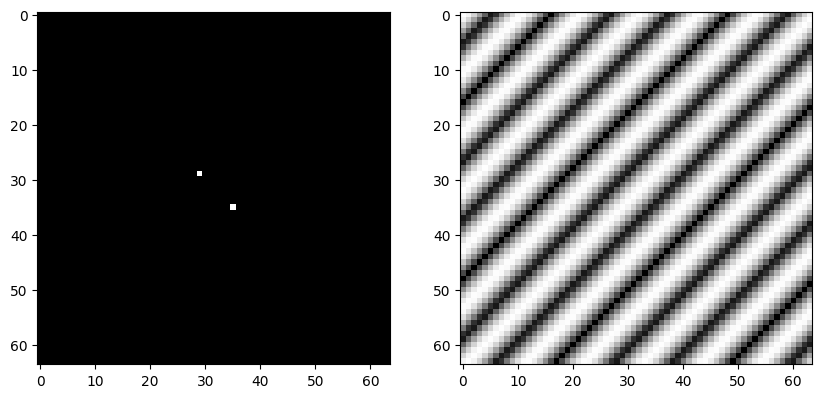

In [38]:
H = np.zeros((64,64)) # Cria uma matriz 64x64 com apenas zeros
M,N = H.shape # Armazena em M e N o comprie=mento e a largura da imagem
cx = int(M/2) # Encontra o pixel central da imagem no eixo x
cy = int(N/2) # Encontra o pixel central da imagem no eixo y

freq = 3 # Cria uma variável freq e assinala o valor 3

H[cx-freq,cy-freq] = 1 # Faz com que o pixel (29,29) tenha valor 1
H[cx+freq,cy+freq] = 1 # Faz com que o pixel (35,35) tenha valor 1

f = np.fft.ifft2(np.fft.ifftshift(H)) # Calcula a fft inversa de H 
f = np.abs(f) # Calcula o valor absoluto da transformada inversa
f = np.uint8((255*(f-f.min()))/(f.max()-f.min())) # Transforma a imagem, modificando seus limites

# Mostra a figura H e sua anti transformada
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(H,'gray')
plt.subplot(1,2,2)
plt.imshow(f,'gray')
plt.show()

#COMENTÁRIO:


3.2) Varie a frequência (variável 'freq') gerando pelo menos 2 novos padrões senoidais. **Comente os resultados.**

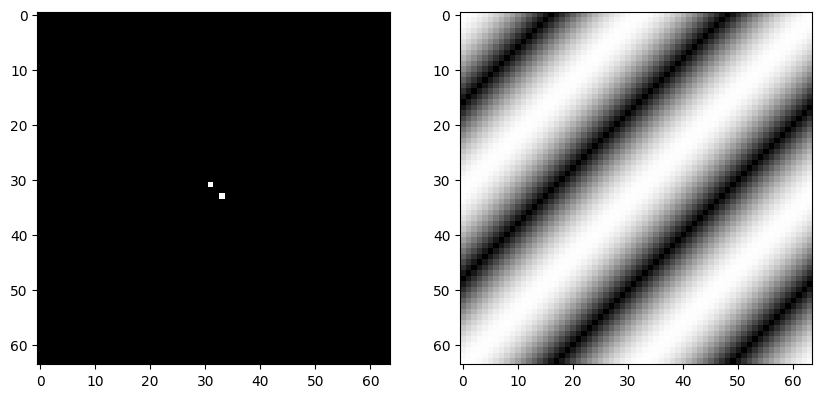

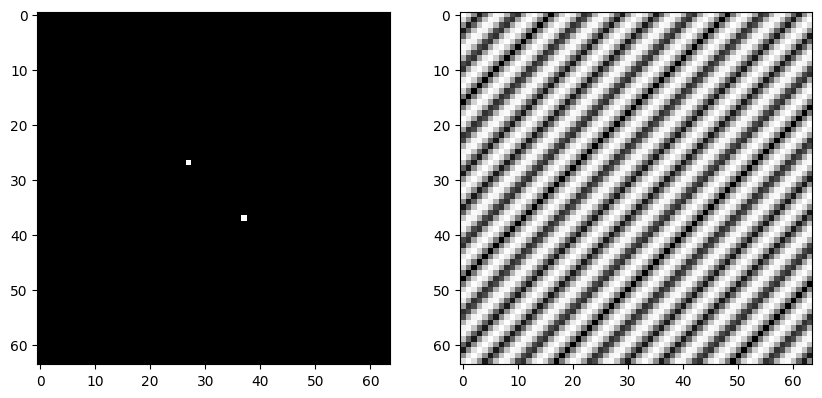

In [41]:
## -- Seu código começa AQUI -- ##
freq = 1

H = np.zeros((64,64))
H[cx-freq,cy-freq] = 1
H[cx+freq,cy+freq] = 1

f = np.fft.ifft2(np.fft.ifftshift(H))
f = np.abs(f)
f = np.uint8((255*(f-f.min()))/(f.max()-f.min()))


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(H,'gray')
plt.subplot(1,2,2)
plt.imshow(f,'gray')
plt.show()

freq = 5

H = np.zeros((64,64))
H[cx-freq,cy-freq] = 1
H[cx+freq,cy+freq] = 1

f = np.fft.ifft2(np.fft.ifftshift(H))
f = np.abs(f)
f = np.uint8((255*(f-f.min()))/(f.max()-f.min()))


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(H,'gray')
plt.subplot(1,2,2)
plt.imshow(f,'gray')
plt.show()
## -- Seu código termina AQUI -- ##

#COMENTÁRIO:
# A imagem criada representa as componentes senoidais que estão presentes nas imagens.
#  Quanto mais afastados os pontos estão da origem, maior é a frequência da senoide
#  e é isso que se observa nas figuras geradas.